# 1. zadatak

In [31]:
%run zad1/check_grads.py

Convolution
Check grad wrt input
Relative error =  7.51757712517256e-10
Error norm =  3.32470564938306e-10
Check grad wrt params
Check weights:
Relative error =  5.806204302543164e-11
Error norm =  2.841966639635822e-10
Check biases:
Relative error =  5.185852366033641e-12
Error norm =  5.855957636410198e-11

MaxPooling
Check grad wrt input
Relative error =  3.2756381493177025e-12
Error norm =  9.757663517980937e-11

ReLU
Check grad wrt input
Relative error =  3.2756417579635854e-12
Error norm =  5.814211428965986e-11

FC
Check grad wrt input
Relative error =  5.52524951851382e-09
Error norm =  8.231621149350728e-10
Check grad wrt params
Check weights:
Relative error =  9.980623398308908e-10
Error norm =  7.79352140691715e-10
Check biases:
Relative error =  3.5883003854740795e-11
Error norm =  1.1121276223333535e-10

SoftmaxCrossEntropyWithLogits
Relative error =  3.384583347610915e-07
Error norm =  6.488336314281318e-10

L2Regularizer
Check grad wrt params
Relative error =  6.74654719

#### Broj parametara:

     1) conv1: 
         16F, 5x5
         (5*5 + 1) * 16 = 416 
         dim: (24, 24, 16)
     2) maxPool1:
         dim: (12, 12, 16)
     3) relu
     4) conv2: 
         32F, 5x5
         (5*5*16 + 1)*32 = 12832 
         dim: (8, 8, 32)
     5) maxPool2:
         dim: (4, 4, 32)
     6) relu
     7) flatten
     8) fc:
         (4*4*32 + 1) * (512) = 262 656 
     9) relu
    10) softmax:
         (512 + 1) * 10 = 5130 
    
    ukupno = 281 034 parametara

In [44]:
import tensorflow.keras as keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Softmax, ReLU, Flatten

model = keras.Sequential([
    Conv2D(16, (5, 5), input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    ReLU(),
    
    Conv2D(32, (5, 5)),
    MaxPooling2D((2, 2), strides=2),
    ReLU(),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 re_lu_11 (ReLU)             (None, 12, 12, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 re_lu_12 (ReLU)             (None, 4, 4, 32)         

#### Velicina receptivnog polja:

![Receptive field](zad1/Untitled.png)

#### Kolicina memorije potrebna za backprop:

    1) 281 034 parametara * 50 batch_size = 14 051 700
    2) 14 051 700 parametara * 4 B = 56 206 800 B
    3) 56 206 800 B * 10^-6 = 56.2068 MB

#### Veza između početnog iznosa funkcije gubitka i broja razreda C:
    Što je više razreda C manja je šansa da će potpuno nasumičan klasifikator pogriješiti pa je i vrijednost funkcije gubitka veća.

# 2. zadatak

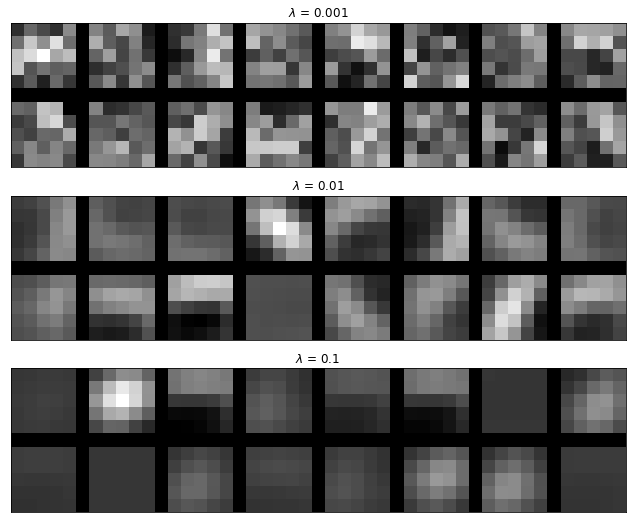

In [55]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

for i, l in enumerate([0.001, 0.01, 0.1]):
    axs[i].imshow(plt.imread(f'./zad1/out_reg_{l}/conv1_epoch_08_step_050000_input_000.png'), interpolation='nearest', cmap='gray')
    axs[i].set_title(f'$\lambda$ = {l}')
    axs[i].set_xticks([]); axs[i].set_yticks([]); 